In [1]:
import pytest
import numpy as np
import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
a = sys.path.append('../modules/')
import plot_3D, auxiliars, salve_doc, sphere, sample_random, Operators,aux_operators
import timeit
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection


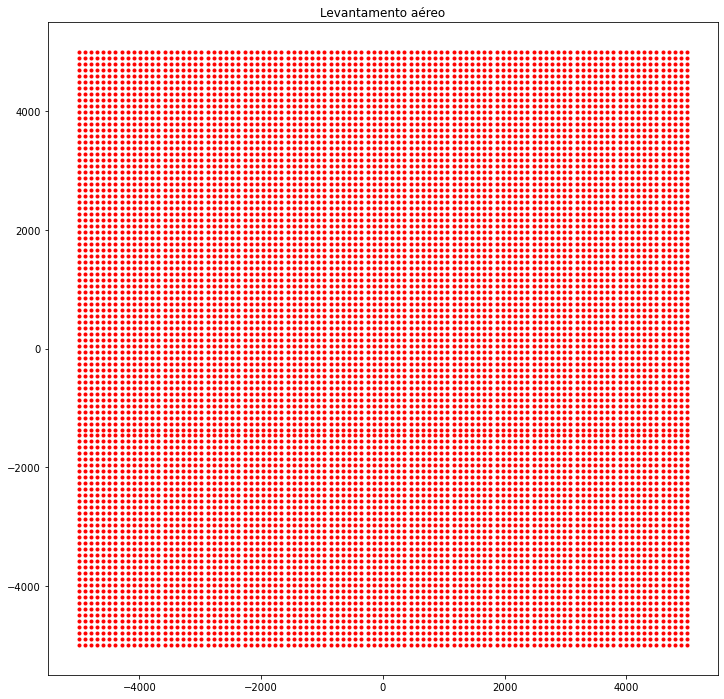

In [2]:
acquisition = {'nx': 100,
                  'ny': 100,
                  'xmin': -5000,
                  'xmax': 5000,
                  'ymin': -5000,
                  'ymax': 5000,
                  'z': -100.0,
                  'color': '.r'}

x, y, X, Y, Z = plot_3D.create_aquisicao(**acquisition)

data_cubo = pd.read_table('Logfile/20_09_2020_11_26/data_mag.cvs', sep =',')
anomaly_cubo = np.reshape(np.array(data_cubo['Anomalia Magnética(nT)']), (100,100))

## Create Population

In [3]:
population = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 1400.0,
                'z_min': 600.0,
                'n_dip': 5,
                'n_pop': 30,
                'inclmax': -40.0,
                'inclmin': -20.0,
                'declmax': -20.0,
                'declmin': 0.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }
I, D = -30.0, -23.0

filhos_mut = {'xmax': 5000.0,
                'xmin': -5000.0,
                'ymax': 5000.0,
                'ymin': -5000.0,
                'zlim': 1500.0,
                'z_min': 500.0,
                'n': 1,
                'inclmax': -40.0,
                'inclmin': -20.0,
                'declmax': -20.0,
                'declmin': 0.0,
                'magmax': 5.0,
                'magmin': 0.5,
                'homogeneo': True
                }


In [4]:
def create_population_dic(xmax, xmin, ymax, ymin, zlim, z_min, inclmax, inclmin, declmax, declmin, magmax, magmin, n_dip, n_pop, homogeneo):
    """
    Função com o objetivo de criar uma população com n indivíduos randômicos, que estaram de acordo com os parâmetros
    escolhidos.

    :param xmax: O valor máximo da coordenada X.
    :param ymax: O valor máximo da coordenada Y.
    :param zlim: O valor máximo da coordenada Z.
    :param xmin: O valor minímo da coordenada X.
    :param ymin: O valor minímo da coordenada Y.
    :param z_min: O valor minímo da coordenada Z.
    :param n_pop: O número de indivíduos desejados na população.
    :param n_dip: O número de dipolos desejados para cada indivíduo.
    :param inclmax: Valor máximo da inclianção magnética.
    :param inclmin: Valor mínimo da inclianção magnética.
    :param declmax: Valor máximo da inclianção magnética.
    :param declmin: Valor mínimo da declianção magnética.
    :param magmax: Valor máximo da magnetização.
    :param magmin: Valor mínimo da magnetização.
    :param homogeneo: True para valores de inclinação, declinação e magnetização iguais para as n dipolos.
                      False é a opção default, onde os valores de inclinação, declinação e magnetização é criada de
                      forma randômica.

    :return pop: Lista com n indivíduos/dipolos criados de forma randômica.
    """
    if n_pop >= 10:
        pop = []
        n_par = 3
        for j in range(n_pop):
            cood = np.zeros((n_dip, n_par))
            coodX, coodY, coodZ = sample_random.sample_random_coordinated(xmax, xmin, ymax, ymin, zlim, z_min, n_dip)
            incl, decl, mag = sample_random.sample_random_mag(inclmax, inclmin, declmax, declmin, magmax, magmin, 1, homogeneo)
            for i in range(n_dip):
                cood[i][0], cood[i][1], cood[i][2] = coodX[i], coodY[i], coodZ[i]
            individuo = {'cood': cood, 'incl': incl, 'decl': decl, 'mag': mag}
            pop.append(individuo)    
        return pop
    else:
        return print('Por favor. Coloque o número de indivíduos maior ou igual a 10')


In [5]:
pop_test = create_population_dic(**population)

In [6]:
print(pop_test)

[{'cood': array([[ 1438.16377151,  4676.88376511,  1182.37701566],
       [   70.54728655, -3583.58637783,  1333.65605296],
       [ 3790.0636865 , -3607.08023357,  1063.12019323],
       [ 2695.79961285, -1624.924856  ,   783.24448345],
       [-1248.53953137,  1526.68476938,  1066.37677875]]), 'incl': [-24.461596191008873], 'decl': [-7.275647314405978], 'mag': [3.1586890238769443]}, {'cood': array([[-4713.24592165,  3237.5483644 ,   928.35946479],
       [-4771.94043739,   230.67121392,   696.99319099],
       [ 2529.14892265, -2368.03204831,   726.02715668],
       [-4057.30461557, -1379.67591283,  1249.11659249],
       [-4662.47995247,  -612.08835269,   901.40921795]]), 'incl': [-29.0897137995667], 'decl': [-5.652024588731528], 'mag': [1.6916341895321572]}, {'cood': array([[ 3822.06044856,  1773.02021065,  1160.97870795],
       [ 3608.43405935, -1904.70453062,   735.96025742],
       [ -815.13915694,  1440.85815092,   609.42788483],
       [-2541.28765654,   146.03588351,  1285.3

In [7]:
%timeit create_population_dic(**population)

1.78 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
print(len(pop_test))
print(len(pop_test[0]))
print(pop_test[0])
print(pop_test[0]['cood'])
print('========================')
print(pop_test[0]['cood'][1])
print(pop_test[0]['cood'][1][0])
print(pop_test[0]['incl'])
print(len(pop_test[0]['cood']))
print(type(pop_test[0]['incl']))

30
4
{'cood': array([[ 1438.16377151,  4676.88376511,  1182.37701566],
       [   70.54728655, -3583.58637783,  1333.65605296],
       [ 3790.0636865 , -3607.08023357,  1063.12019323],
       [ 2695.79961285, -1624.924856  ,   783.24448345],
       [-1248.53953137,  1526.68476938,  1066.37677875]]), 'incl': [-24.461596191008873], 'decl': [-7.275647314405978], 'mag': [3.1586890238769443]}
[[ 1438.16377151  4676.88376511  1182.37701566]
 [   70.54728655 -3583.58637783  1333.65605296]
 [ 3790.0636865  -3607.08023357  1063.12019323]
 [ 2695.79961285 -1624.924856     783.24448345]
 [-1248.53953137  1526.68476938  1066.37677875]]
[   70.54728655 -3583.58637783  1333.65605296]
70.54728655278541
[-24.461596191008873]
5
<class 'list'>


## Fit

In [9]:
def tfa_n_dips(incl, decl, mag, n, Xref, Yref, Zref, I, D, spheres):
    """
    Função com o objetivo calcular a anomalia magnética de n bolinhas.

    As entradas da função é feita da forma clássica ou através de um dicionário que é descompactado.
    O dicinário deve conter as chaves nomeadas de forma identica aos parâmetros de entrada da função.
    Exemplo de entrada: tfa_n_dots(**dicionario).

    :param dicionario: incl - Lista com os valores de inclinação magnética.
                       decl - Lista com os valores de declinação magnética.
                       mag - Lista com os valores de magnetização.
                       n - número de bolinhas desejadas.
                       Xref - Matrix com as coordenadas em X.
                       Yref - Matrix com as coordenadas em Y.
                       Zref - Matrix com as coordenadas em Z.
                       I - valor de inclinação regional.
                       D - valor de declinação regional.
                       spheres - Lista com os valores de coordenadas e raio de cada dipolo.
                           spheres[0] - Coordenada no eixo X.
                           spheres[1] - Coordenada no eixo Y.
                           spheres[2] - Coordenada no eixo Z.
                           spheres[3] - Raio do dipolo.
    :return: Uma matrix com os valores de anomália magnética para cada ponto do local estudado.
    """

    # ---------------------------------------------------------------------------------------------------------------------#
    tfa_n = 0
    for i in range(n):
        tfa_cada = sphere.sphere_tfa(Xref, Yref, Zref, spheres[i], mag[0], I, D, incl[0], decl[0])
        tfa_n += tfa_cada

    return tfa_n

In [10]:
def caculation_anomaly(X, Y, Z, I, D, pop):
    raio = 100.0
    anomaly = []

    for i in range(len(pop)):
        spheres = []
        incl = pop[i]['incl']
        decl = pop[i]['decl']
        mag = pop[i]['mag']
        for j in range(len(pop[0]['cood'])):
            spheres.append((pop[i]['cood'][j][0], pop[i]['cood'][j][1], pop[i]['cood'][j][2], raio))
        anomaly.append(tfa_n_dips(incl, decl, mag, len(pop[0]), X, Y, Z, I, D, spheres))
    return anomaly

In [11]:
def fit_value_v2(X, Y, Z, I, D, pop, tfa_n_dip):
    """
    Função que calcula o fitness de cada indivíduo da população.

    :param X: Pontos de observação na coordenadas X.
    :param Y: Pontos de observação na coordenadas Y.
    :param Z: Pontos de observação na coordenadas Z.
    :param I: Inclinação magnética regional.
    :param D: Declinação magnética regional.
    :param pop: População com n indivíduos.
    :param tfa_n_dip: Anomalia magnética referência.

    :return fit_cada: Lista com o valor de fitness de cara indivíduo da população.
    """
    fit_cada = []
    anomalia = caculation_anomaly(X, Y, Z, I, D, pop) #Cálculo da anomalia
    for i in range(len(pop)):
        fit_cada.append(aux_operators.f_difference(tfa_n_dip, anomalia[i])) #Cálculo do fit
    return fit_cada


In [12]:
fit_ = fit_value_v2(X, Y, Z, I, D, pop_test, anomaly_cubo)

In [13]:
print(fit_)

[101.44014758165395, 101.22352255985366, 101.89164117948633, 99.92632433264548, 100.85796739943932, 97.9976601919779, 101.1177497834279, 101.01383616285686, 101.70693046956465, 100.50858929812394, 101.27873782723832, 101.41098527670083, 100.72801621271594, 100.8865348125249, 98.64069944360563, 100.85126792812851, 101.43515841881317, 101.13791923004936, 100.28310507075304, 100.88066811141802, 100.23879797290456, 101.70410585841384, 101.18369414534192, 101.39081788507612, 99.75898342330456, 101.20554675660844, 101.00225067684224, 100.87551329684845, 100.05690987895889, 99.42032540003629]


In [14]:
%timeit fit_value_v2(X, Y, Z, I, D, pop_test, anomaly_cubo)

280 ms ± 52.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Nova função para auxiliar o crossover_eletista:

In [15]:
#def count_index_fit(index):
lista = [9 , 0 , 5, 5]
def count_index_fit(lista):
    escolhido = []
    for i in range(len(lista)):
        n = lista[i]
        B = len([i for i in lista[0:i] if i <= n])
        n += B
        escolhido.append(n)
    return escolhido
'''
for i in range(len(index)-1):
        if num > index[i]:
            num += i
'''

lista1 = count_index_fit(lista)
print(lista1)

[9, 0, 6, 7]


In [16]:
x_test = np.linspace(0, 20, 20)
i_escolhido = list(x_test[lista1])
print(i_escolhido)
print(len(i_escolhido))
print(type(i_escolhido))

[9.473684210526315, 0.0, 6.315789473684211, 7.368421052631579]
4
<class 'list'>


## Seleção por torneio:

In [17]:
def tournament_selection_v2(pop, fit_cada):
    """
    Função com o objetivo de selecionar os futuros pais, pelo dinâmica do Torneio.

    :param pop: População com n indivíduos.
    :param fit_cada: O valor de fitness para cada n indivpiduos.

    :return chosen: Lista com os n pais.
    """

    pop_1 = pop.copy()
    chosen = []
    select = []
    for i in range(int(0.2 * len(pop))):
        capture_select = []
        # ---------------------------- Escolhidos para o torneio ---------------------------------#
        index_select = list(random.sample(range(0, len(pop_1)), k=(int(0.2 * len(pop)))))
        for j in range(int(0.2 * len(pop))):
            capture = [fit_cada[index_select[j]], index_select[j]]
            capture_select.append(capture)
        # ---------------------------- Vencedor do torneio ---------------------------------#
        escolhido = pop_1[min(capture_select[:])[1]]
        select.append(min(capture_select[:])[1])
        # ------------------ Retirada do vencedor da população artificial ------------------------#
        del (pop_1[min(capture_select[:])[1]])
        # ---------------------------- Vencedores do torneio ---------------------------------#
        chosen.append(escolhido)

    return chosen, select

pais_, escolhidos = tournament_selection_v2(pop_test, fit_)

In [18]:
print(escolhidos)

[24, 3, 14, 6, 19, 14]


In [19]:
escolhido = count_index_fit(escolhidos)
print(escolhido)

[24, 3, 15, 7, 22, 17]


## Croosover_eletista:

In [23]:
def definition_prob(pai_torneio, escolhidos, fit, n_filhos):
    prob_pai = []
    prob_mae = []
    sum_den = []
    fit = np.array(fit)
    escolhidos = count_index_fit(escolhidos)

    fit_pais = list(fit[escolhidos])
    f_pais, f_maes = fit_pais[0:n_filhos], fit_pais[n_filhos:len(pai_torneio)]
    for i in range(n_filhos):
        casal = [f_pais[i], f_maes[i]]
        melhor = casal.index(min(casal))
        if melhor == 0:
            prob_pai.append(random.uniform(0.5, 1.0))
            prob_mae.append(random.random())
        else:
            prob_mae.append(random.uniform(0.5, 1.0))
            prob_pai.append(random.random())
        sum_den.append(prob_pai[i] + prob_mae[i])

    return prob_pai, prob_mae, sum_den


In [24]:
def crossover_eletista(pais_torneio, escolhidos, fit):
    filhos = []
    n_filhos = int(len(pais_torneio) / 2)
    pai = np.array(pais_torneio[0:n_filhos])
    mae = np.array(pais_torneio[n_filhos:len(pais_torneio)])
    # Sorteio das probabilidades de forma randômica.
    prob_pai, prob_mae, den = definition_prob(pais_torneio, escolhidos, fit, n_filhos)

    for j in range(n_filhos):
        num = (prob_pai[j] * pai[j] + prob_mae[j] * mae[j])
        filho = num / den[j] # Cálculo do filho
        filhos.append(filho)

    return filhos


In [25]:
pais_croosover = crossover_eletista(pais_, escolhidos, fit_)

TypeError: unsupported operand type(s) for *: 'float' and 'dict'